In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
wta = pd.read_excel("wta_19_21.xlsx")

In [4]:
wta.head()

,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Auckland,ASB Classic,2018-12-31,International,Outdoor,Hard,1st Round,3,Puig M.,...,0.0,Completed,1.36,3.00,1.38,3.29,1.43,3.29,1.37,3.09
1,1,Auckland,ASB Classic,2018-12-31,International,Outdoor,Hard,1st Round,3,Davis L.,...,0.0,Completed,1.44,2.62,1.55,2.60,1.57,2.88,1.50,2.59
2,1,Auckland,ASB Classic,2018-12-31,International,Outdoor,Hard,1st Round,3,Kuzmova V.,...,0.0,Completed,1.61,2.20,1.65,2.36,1.68,2.50,1.62,2.28
3,1,Auckland,ASB Classic,2018-12-31,International,Outdoor,Hard,1st Round,3,Bouchard E.,...,0.0,Completed,1.50,2.50,1.55,2.62,1.66,2.75,1.53,2.51
4,1,Auckland,ASB Classic,2018-12-31,International,Outdoor,Hard,1st Round,3,Sorribes Tormo S.,...,0.0,Completed,2.25,1.57,2.40,1.63,3.27,1.65,2.35,1.59


In [5]:
wta.columns

Index(['WTA', 'Location', 'Tournament', 'Date', 'Tier', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'Wsets', 'Lsets', 'Comment',
       'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

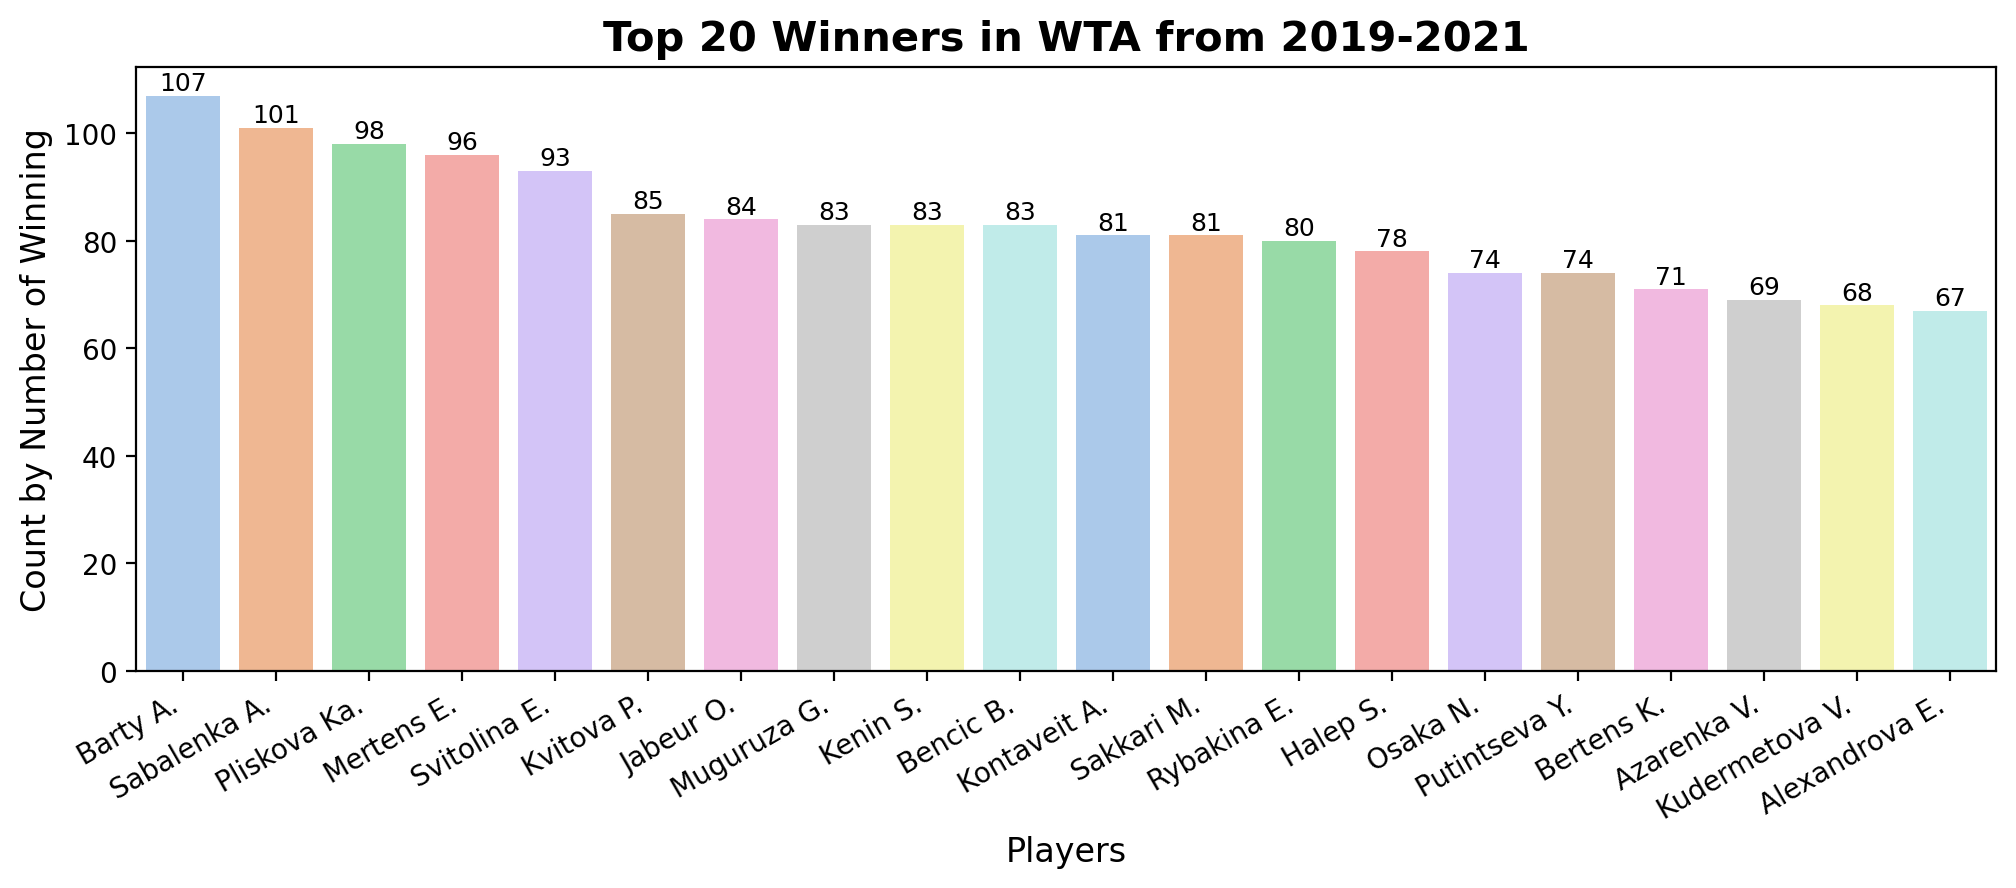

In [32]:
plt.figure(figsize=(12,4), dpi=200)
ax1= sns.countplot(x='Winner', data = wta ,order= pd.value_counts(wta['Winner']).iloc[:20].index,palette='pastel')
plt.title('Top 20 Winners in WTA from 2019-2021', weight='bold', fontsize=15)
plt.xticks(rotation = 30, ha = 'right')
plt.xlabel('Players', fontsize=12)
plt.ylabel('Count by Number of Winning', fontsize=12)

for i in ax1.patches:
    ax1.text (i.get_x() + i.get_width()/2,i.get_height()+ 1.,i.get_height(),
    horizontalalignment='center', fontsize = 9)

plt.savefig('wta_winner.png')

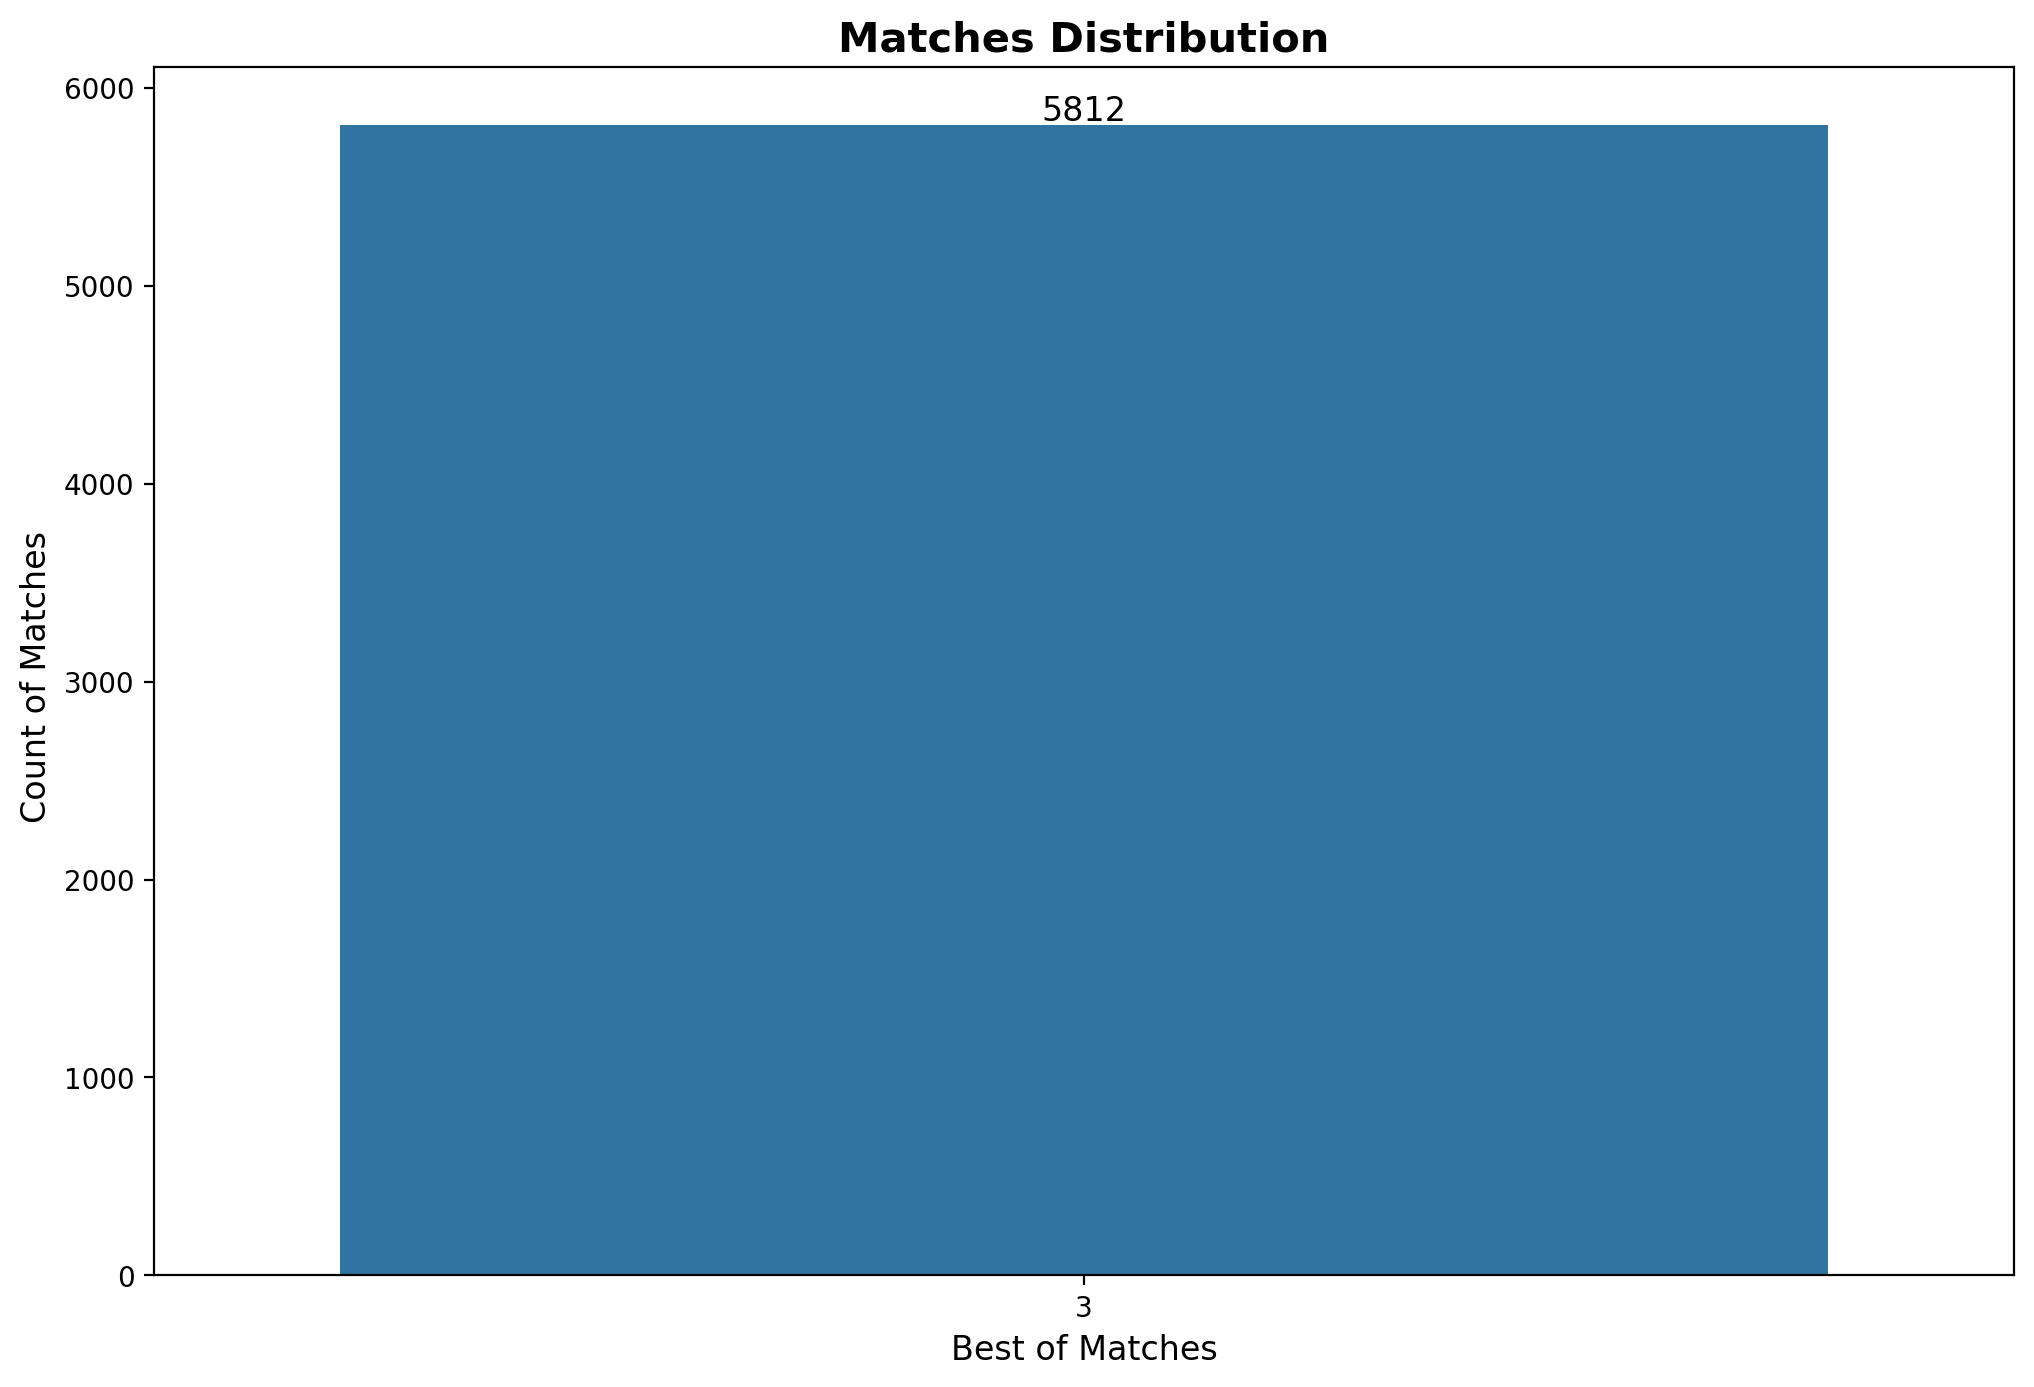

In [7]:
plt.figure(figsize=(12,8), dpi=200)
ax2= sns.countplot(x='Best of', data = wta)
plt.title('Matches Distribution', weight='bold', fontsize=15)
plt.xlabel('Best of Matches', fontsize=12)
plt.ylabel('Count of Matches ', fontsize=12)

for i in ax2.patches:
    ax2.text (i.get_x() + i.get_width()/2,i.get_height()+ 20.,i.get_height(),
    horizontalalignment='center', fontsize = 12)

Text(0.5, 1.0, 'Surface played by players')

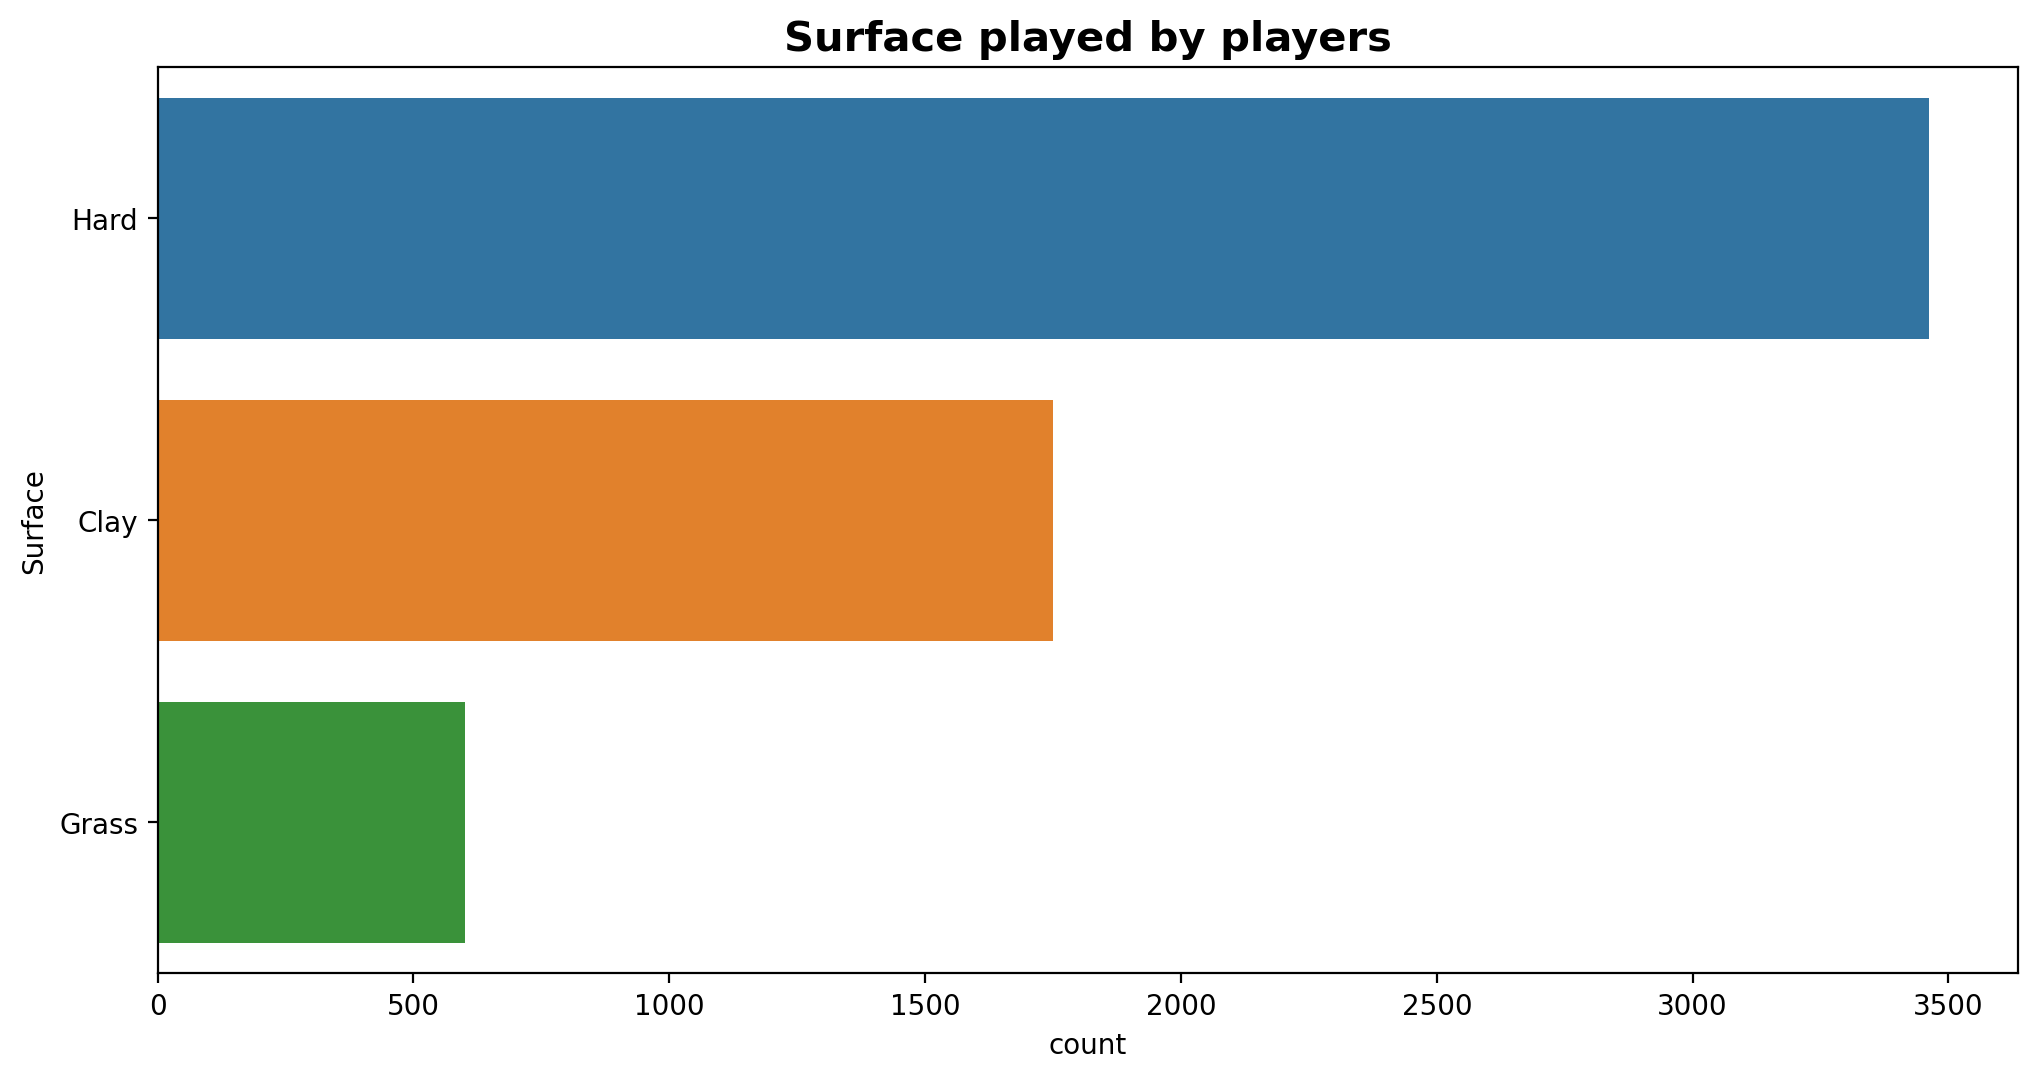

In [8]:
plt.figure(figsize=(12,6), dpi=200)
ax4 = sns.countplot(y='Surface', data =wta)
plt.title('Surface played by players',weight='bold',fontsize=15)


## What is the Upset chance in Grand Slams for Women players?

### we consider upset if Loser Rank is less than 5 in ranking compared to Winner Rank

In [9]:
upset = wta[['Tournament','Tier', 'Round', 'Winner','Loser','WRank', 'LRank']]
upset['Tier'].unique()

array(['International', 'Premier', 'Grand Slam', 'Tour Championships',
       'WTA500', 'WTA250', 'WTA1000', 'WTA251', 'WTA252', 'WTA253',
       'WTA254', 'WTA255', 'WTA256', 'WTA257', 'WTA258', 'WTA259',
       'WTA260', 'WTA261', 'WTA262', 'WTA263', 'WTA264', 'WTA265',
       'WTA266', 'WTA267', 'WTA268', 'WTA269', 'WTA270', 'WTA271',
       'WTA272', 'WTA273', 'WTA274', 'WTA275', 'WTA276'], dtype=object)

In [10]:
upset = upset[(upset.Tier == 'Grand Slam')]

In [11]:
len(upset)

1397

In [12]:
upset['upset'] = np.where(upset['WRank'] - upset['LRank'] >=5,1,0)

In [13]:
upset.head()

,Tournament,Tier,Round,Winner,Loser,WRank,LRank,upset
151,Australian Open,Grand Slam,1st Round,Vickery S.,Bonaventure Y.,123.0,159.0,0
152,Australian Open,Grand Slam,1st Round,Boulter K.,Makarova E.,97.0,60.0,1
153,Australian Open,Grand Slam,1st Round,Peterson R.,Cirstea S.,64.0,84.0,0
154,Australian Open,Grand Slam,1st Round,Collins D.,Goerges J.,35.0,13.0,1
155,Australian Open,Grand Slam,1st Round,Sabalenka A.,Kalinskaya A.,11.0,146.0,0


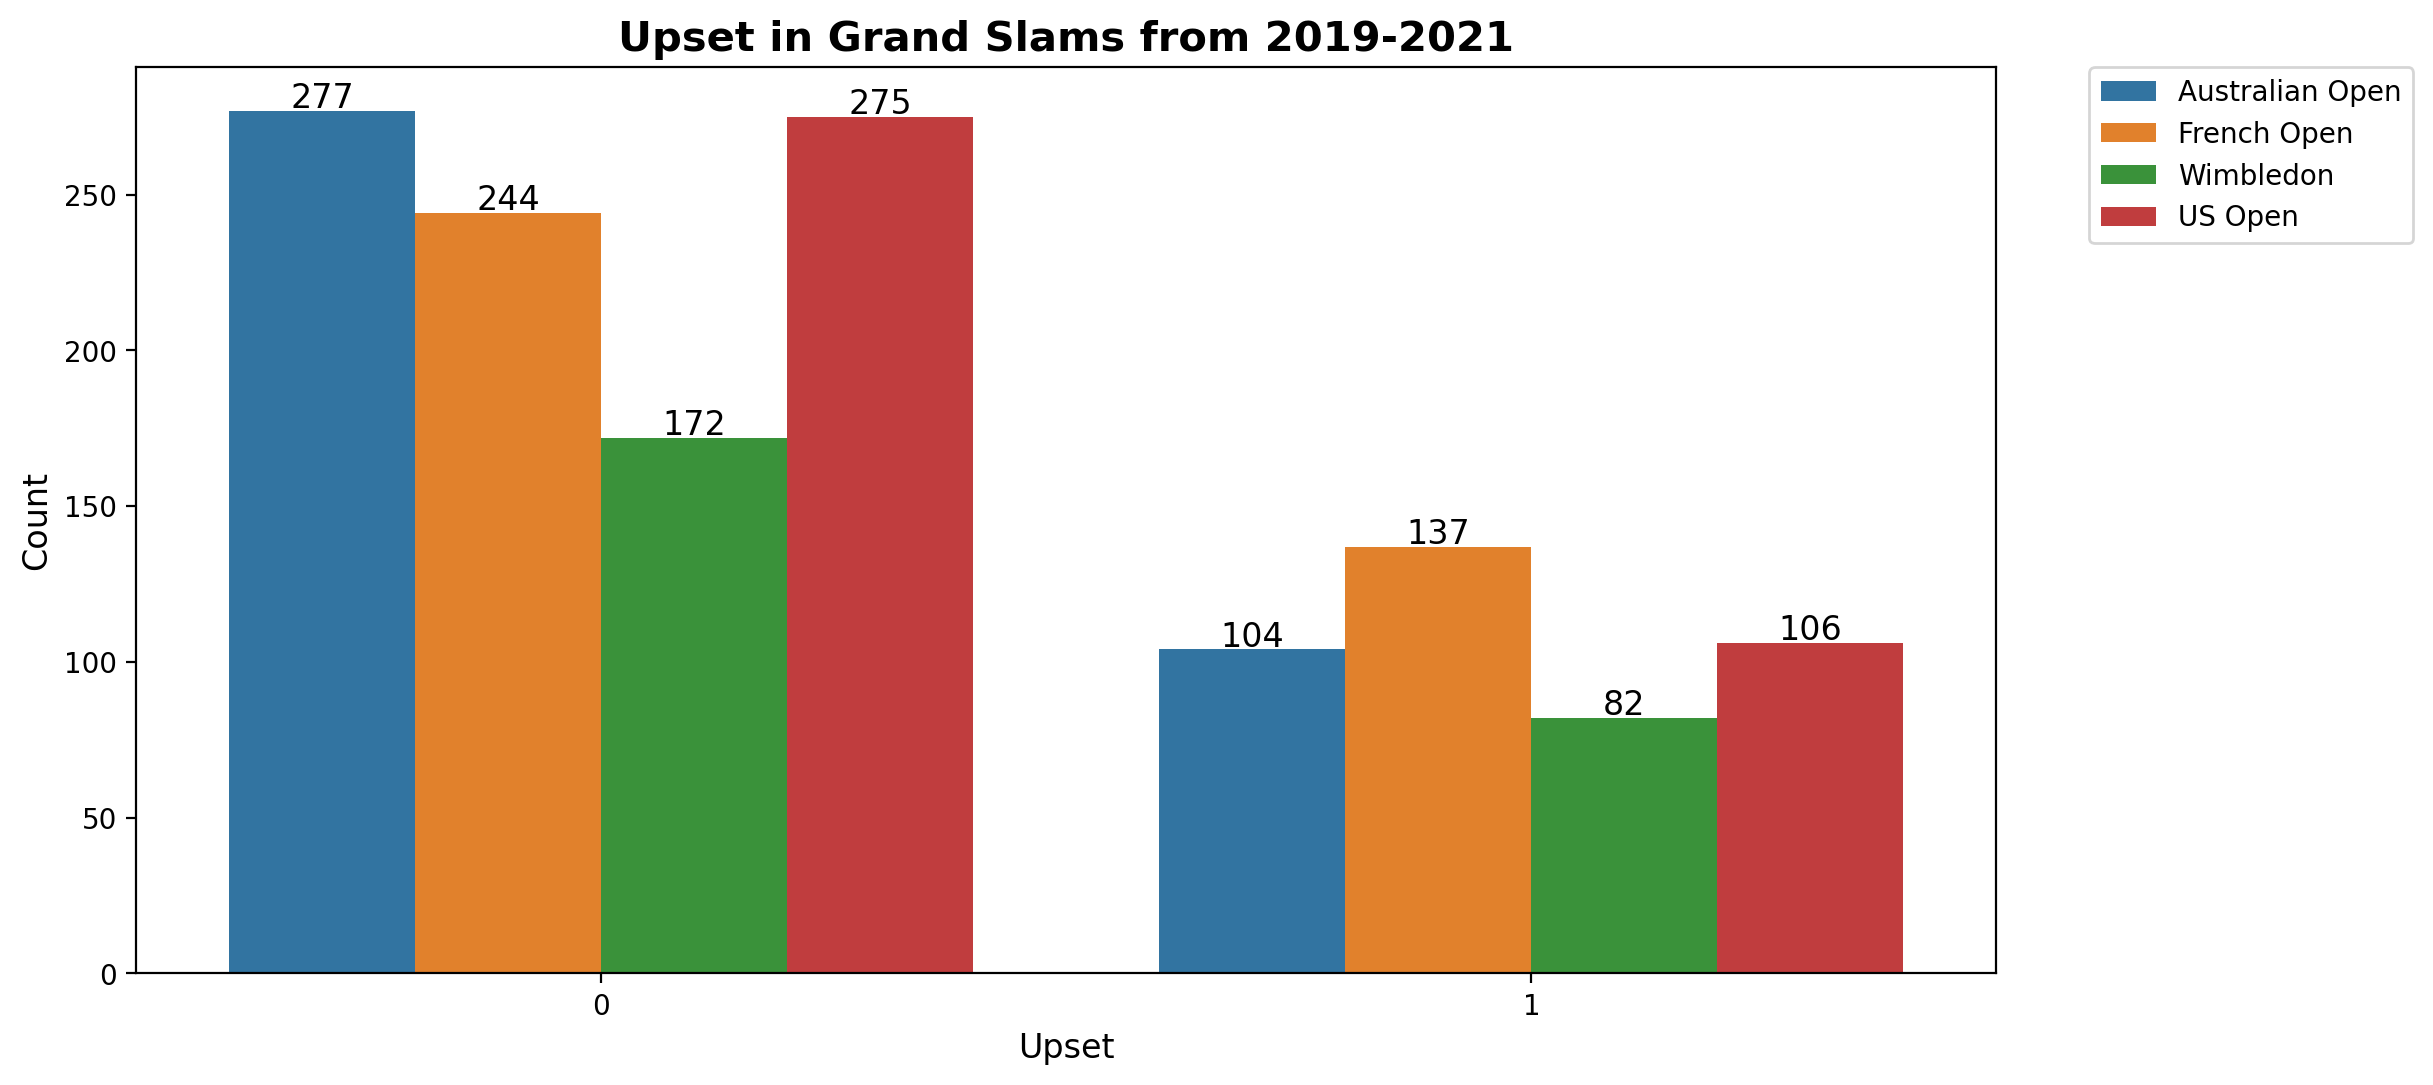

In [14]:
plt.figure(figsize=(12,6), dpi=200)
ax7= sns.countplot(x='upset',hue='Tournament', data = upset)
plt.title('Upset in Grand Slams from 2019-2021', weight='bold', fontsize=15)
plt.xlabel('Upset', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for i in ax7.patches:
    ax7.text (i.get_x() + i.get_width()/2,i.get_height()+ 1.,i.get_height(),
    horizontalalignment='center', fontsize = 12)

In [15]:
australian_open_upset = (round(104/(277+104),2)*100)
australian_open_upset

27.0

In [16]:
french_open_upset = (round(137/(244+137),2)*100)
french_open_upset

36.0

In [17]:
wimbledon_upset = (round(82/(172+82),2)*100)
wimbledon_upset

32.0

In [18]:
us_open_upset = (round(106/(275+106),2)*100)
us_open_upset

28.000000000000004

In [19]:
slams_upset = pd.DataFrame({'Tournament': ['Australian Open', 'French Open', 'Wimbledon', 'US Open'],
                   'Percentage of Upset': [australian_open_upset, french_open_upset, wimbledon_upset, us_open_upset]})

In [20]:
slams_upset

,Tournament,Percentage of Upset
0,Australian Open,27.0
1,French Open,36.0
2,Wimbledon,32.0
3,US Open,28.0


In [23]:
player = pd.read_csv("players.csv")

In [24]:
player.head()

,player_id,first_name,last_name,hand,birth_date,country_code
0,200001,Martina,Hingis,R,19800930.0,SUI
1,200002,Mirjana,Lucic,R,19820309.0,CRO
2,200003,Justine,Henin,R,19820601.0,BEL
3,200004,Kerry Anne,Guse,R,19721204.0,AUS
4,200005,Jolene,Watanabe Giltz,R,19680831.0,USA


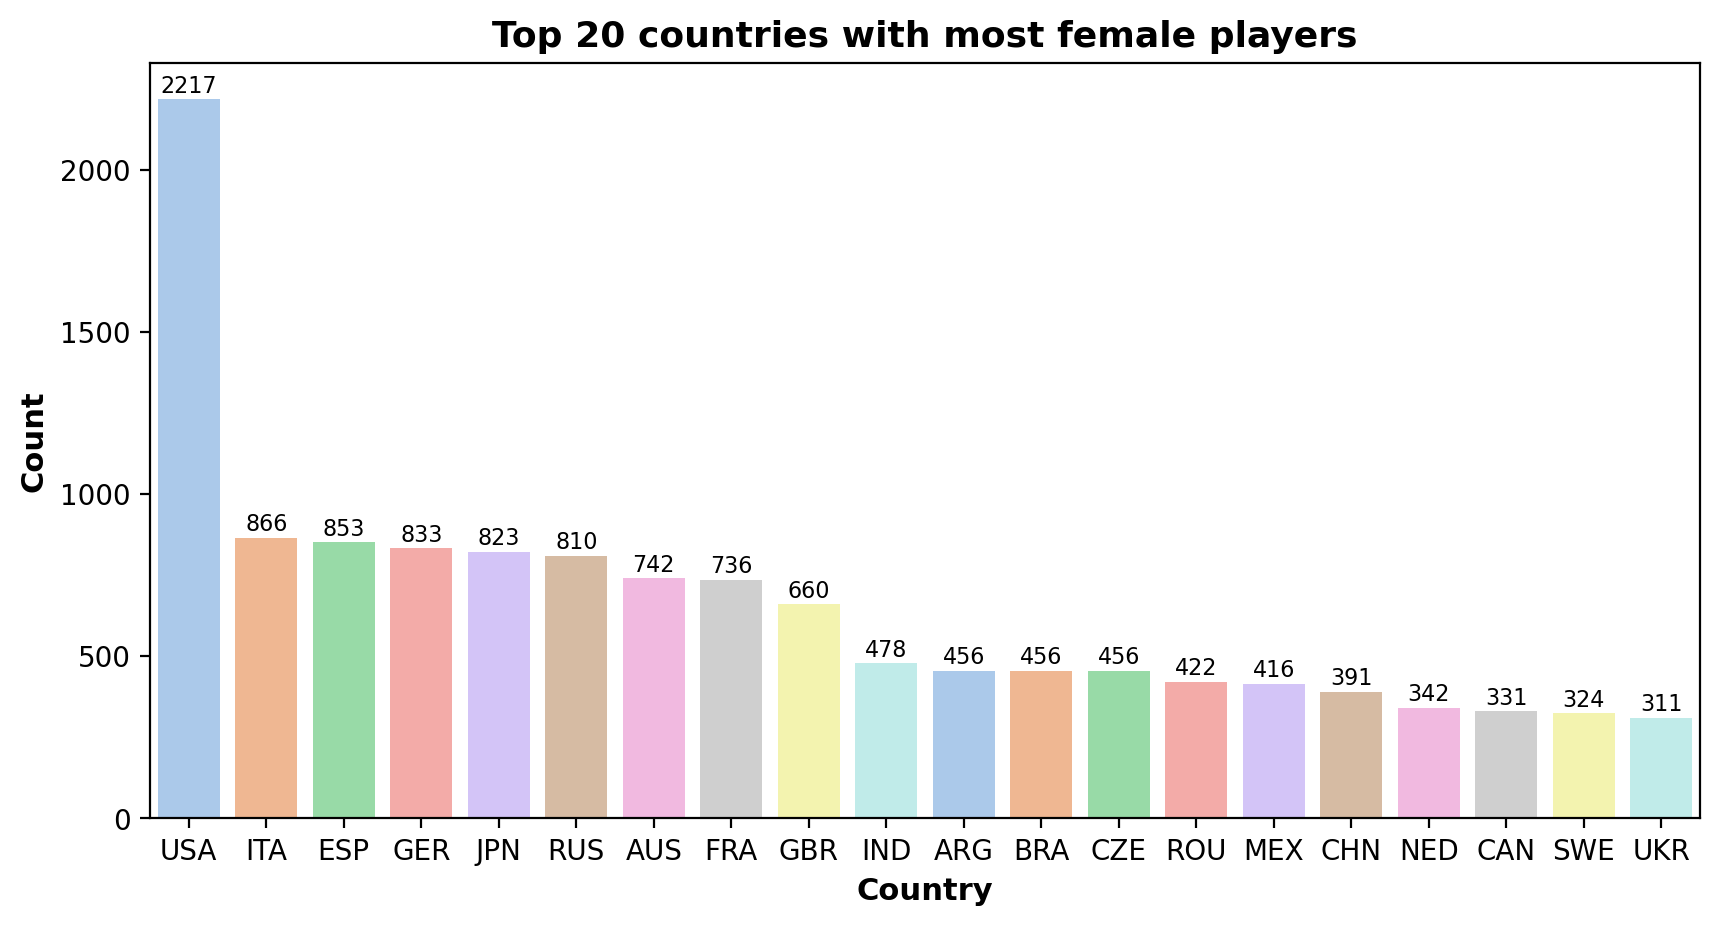

In [31]:
#plot to show countries with the most active, avid female players 
plt.figure(figsize=(10,5), dpi=200)
ax = sns.countplot(x='country_code', data = player,order= pd.value_counts(player['country_code']).iloc[:20].index, palette='pastel')
plt.title('Top 20 countries with most female players', weight='bold', fontsize=13)
plt.xlabel('Country',weight='bold', fontsize=11)
plt.ylabel('Count',weight='bold', fontsize=11)

for i in ax.patches:
    ax.text (i.get_x() + i.get_width()/2,i.get_height()+ 20.,i.get_height(),
    horizontalalignment='center', fontsize = 8)
    
plt.savefig('wta_country.png')